### 2D Rotational Matrix

In [4]:
# input vector
v = [3, -2]

2-element Vector{Int64}:
  3
 -2

In [2]:
# 2x2 transformational matrix
A = [1 -1; 2 1]

2×2 Matrix{Int64}:
 1  -1
 2   1

In [5]:
# output vector
w = A * v

2-element Vector{Int64}:
 5
 4

In [6]:
using Plots; gr()

Plots.GRBackend()

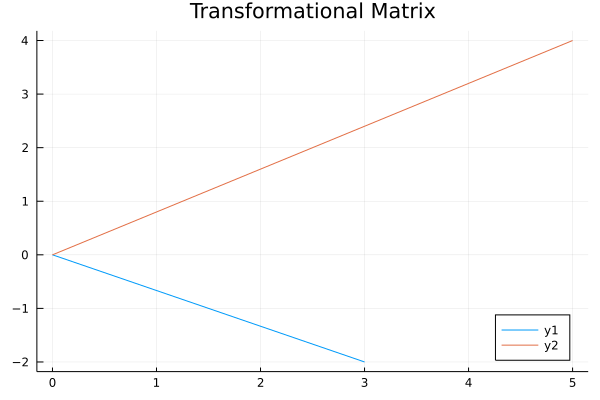

In [53]:
plot([0,v[1]], [0,v[2]], title = "Transformational Matrix")
plot!([0,w[1]], [0,w[2]], legend = :bottomright)

### Pure Rotational Matrix, no scaling

In [14]:
θ = π / 30

0.10471975511965977

In [15]:
# rotational matrix
R = [cos(θ) -sin(θ) ;
     sin(θ)  cos(θ)]

2×2 Matrix{Float64}:
 0.994522  -0.104528
 0.104528   0.994522

In [17]:
x = R * v

2-element Vector{Float64}:
  3.1926226126401267
 -1.6754584009335862

In [18]:
# magnitude of original and rotated vector is the same
using LinearAlgebra
norm(v)

3.605551275463989

In [19]:
norm(x)

3.605551275463989

In [20]:
norm(x) - norm(v)

0.0

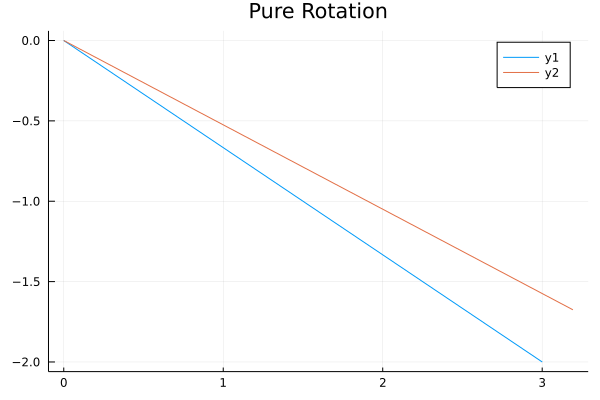

In [52]:
# plotted
plot([0, v[1]], [0, v[2]])
plot!([0, x[1]], [0, x[2]], title = "Pure Rotation")

In [67]:
# try another angle
θ = π / 3

1.0471975511965976

In [68]:
R2 = [cos(θ) -sin(θ) ;
     sin(θ)  cos(θ)]

2×2 Matrix{Float64}:
 0.5       -0.866025
 0.866025   0.5

In [69]:
x2 = R2 * v

2-element Vector{Float64}:
 3.2320508075688776
 1.5980762113533158

In [70]:
# still the same length
norm(x2)

3.6055512754639896

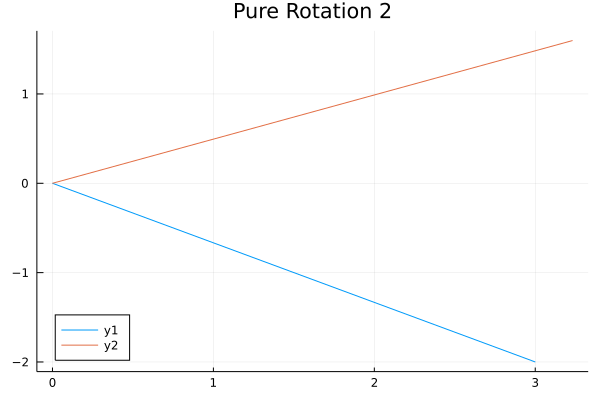

In [71]:
# plotted
plot([0, v[1]], [0, v[2]])
plot!([0, x2[1]], [0, x2[2]], legend = :bottomleft, title = "Pure Rotation 2")

In [31]:
# 3D vector
v3d = [-4, 3, 2]

3-element Vector{Int64}:
 -4
  3
  2

In [32]:
# 3x3 transformational matrix
M3d = [rand(-5:5) for x in 1:3, y in 1:3]

3×3 Matrix{Int64}:
 4   2  0
 0  -4  0
 3   2  4

In [34]:
# transformeed vector
w3d = M3d * v3d

3-element Vector{Int64}:
 -10
 -12
   2

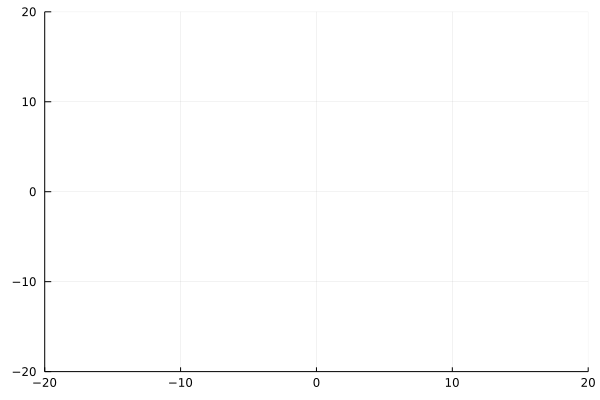

In [56]:
# TODO - learn how to plot 3d points
plot((0,0,0), (v3d[1],v3d[2],v3d[3]), title = "Someone teach me to do this properly!")
plot((0,0,0), (w3d[1],w3d[2],w3d[3]), xlim = (-20, 20), ylim = (-20, 20), zlim = (-20, 20))

### Lecture 50 - Code Challenge

In [72]:
# introduce a scaling factor to rotational matrix
# so it is not purely a rotational matrix
# but magnitude of resulting vector is dependent upon angle
# compare with the purely rotational matrix

In [75]:
# define a range of angles
θ = collect(-2*π:π/30:2*π)

121-element Vector{Float64}:
 -6.283185307179586
 -6.178465552059927
 -6.073745796940266
 -5.969026041820607
 -5.8643062867009474
 -5.759586531581287
 -5.654866776461628
 -5.550147021341968
 -5.445427266222308
 -5.340707511102648
 -5.235987755982989
 -5.131268000863329
 -5.026548245743669
  ⋮
  5.131268000863328
  5.235987755982988
  5.340707511102648
  5.445427266222307
  5.550147021341967
  5.654866776461628
  5.759586531581286
  5.864306286700947
  5.969026041820607
  6.0737457969402655
  6.178465552059926
  6.283185307179586

In [81]:
# modified rotational matrix - generate a vector with a series of values related to θ
modified = []
for transform in θ
  M = [2 * cos(transform) -sin(transform) ;
      sin(transform)  cos(transform)]
  push!(modified, norm(M * v))
end


In [102]:
# pure rotational matrix - generate another vector of values related to θ
pure = []
for transform in θ
  M = [cos(transform) -sin(transform) ;
      sin(transform)  cos(transform)]
  push!(pure, norm(M * v))
end

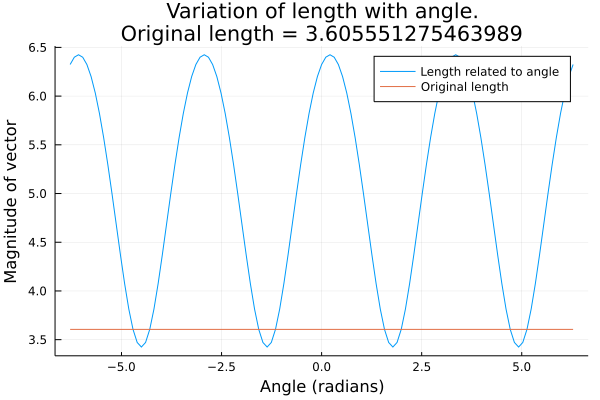

In [108]:
plot(θ, modified, title = "Variation of length with angle.\nOriginal length = $(norm(v))",
    label = "Length related to angle",
    xlabel = "Angle (radians)",
    ylabel = "Magnitude of vector")

plot!(θ, pure, label = "Original length", legend = :topright)

### Lecture 51 - Code Challenge - Geometric Matrix Transformations

In [139]:
# plot a circle: eqn = xcentre + radius * cos(θ), ycentre + radius * sin(θ)
# define a vector with a range of angles
angles = collect(0:π/30:2*π)

# define radius, and coordinates of the cirle's centre 
radius = 1
xcentre = 0
ycentre = 0

# define series of x and y-coordinates for circle
xcoords = zeros(length(angles))
ycoords = zeros(length(angles))

for i in 1:length(angles)
    xcoords[i] = xcentre + radius * cos(angles[i])
    ycoords[i] = ycentre + radius * sin(angles[i])
end

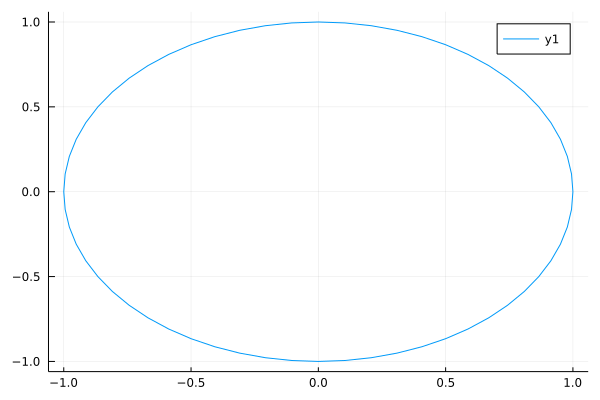

In [140]:
# plot circle - TODO: make square axes
plot(xcoords, ycoords)

In [182]:
# create coordinates for a circle, multiplied by a modifier 2x2 matrix
# default modifier is the 2x2 identity matrix, so result is unchanged unless specified
function circle_coords2(modifier = [1 0;0 1], xcentre = 0, ycentre = 0,  radius = 1)

# create arrays in memory to hold data: range of angles, 2 blank arrays to hold x and y values    
  angles = collect(0:π/30:2*π)
  len = length(angles)
  x = zeros(len)
  y = zeros(len)

# coordinates of a circle:
# x-coordinates = x coordinate for centre of circle + (radius * cos(θ))
# y-coordinates = y-coordinate for centre of circle + (radius * sin(θ))
  for i in 1:len
    x[i] = xcentre + radius * cos(angles[i])
    y[i] = ycentre + radius * sin(angles[i])
  end

# concatenate x and y vectors into a 2-column matrix
# and multiply each row by the modifier
  coords = [x y]
  for i in 1:len
    coords[i,:] = coords[i,:]' * modifier
    end
    
# return the modified coordinates
  return coords
end

circle_coords2 (generic function with 5 methods)

In [185]:
# this function an earlier idea - now not used
function circle_coords(modifier = [1 0;0 1], xcentre = 0, ycentre = 0,  radius = 1)
  tuple_coords = []
  
  for i in 0:π/30:2*π
    push!(tuple_coords, [xcentre + radius * cos(i), ycentre + radius * sin(i)]' * modifier)
  end

  return tuple_coords
end

circle_coords (generic function with 5 methods)

In [195]:
c = circle_coords2() # with default identity matrix

61×2 Matrix{Float64}:
 1.0        0.0
 0.994522   0.104528
 0.978148   0.207912
 0.951057   0.309017
 0.913545   0.406737
 0.866025   0.5
 0.809017   0.587785
 0.743145   0.669131
 0.669131   0.743145
 0.587785   0.809017
 0.5        0.866025
 0.406737   0.913545
 0.309017   0.951057
 ⋮         
 0.406737  -0.913545
 0.5       -0.866025
 0.587785  -0.809017
 0.669131  -0.743145
 0.743145  -0.669131
 0.809017  -0.587785
 0.866025  -0.5
 0.913545  -0.406737
 0.951057  -0.309017
 0.978148  -0.207912
 0.994522  -0.104528
 1.0       -2.44929e-16

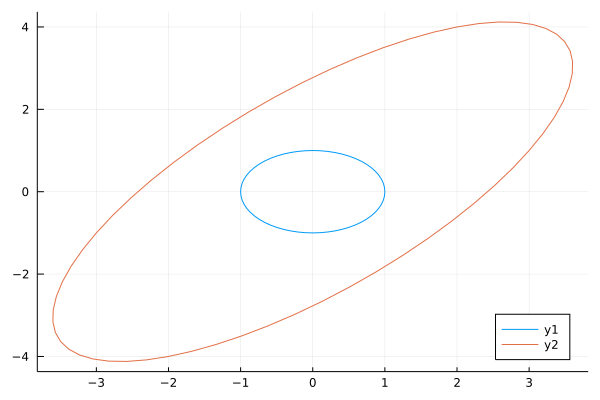

In [201]:
# plot 2 circles - TODO - enable 1:1 aspect ratio
plot([0, c[:,1]], [0, [c[:,2]]])
d = circle_coords2([2 4;3 1]) # with modifier matrix [2 4; 3 1]
plot!([0, d[:,1]], [0, [d[:,2]]], legend = :bottomright)